In [2]:
import pandas as pd
import os
import shutil

In [4]:
#Create the data for positive samples 

FILE_PATH = "covid-chestxray\metadata.csv"
IMAGE_PATH = "covid-chestxray\images"

In [5]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [6]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


# Load Datasets

In [7]:
TARGET_DIR = "Dataset/Train/Covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid FOlder Created")

In [8]:

cnt = 0
for(i,row) in df.iterrows():
    if row["finding"] == "COVID-19" and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
       
        cnt+=1
# print(cnt)

In [9]:
import random
KAGGLE_FILE_PATH = "chest_xray\\train\\NORMAL"
TARGET_NORMAL_DIR = "Dataset\\Train\\Normal"
if not os.path.exists(TARGET_NORMAL_DIR):
    os.mkdir(TARGET_NORMAL_DIR)
    print("Normal Folder Created")
    
image_names = os.listdir(KAGGLE_FILE_PATH) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(144):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
#     print("Moved",i)

In [11]:
#train & validate
TRAIN_PATH = "Dataset/Train"
VAL_PATH = "Dataset/Val"

# **Importing Required Libraries**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **Architecture**


defines a CNN model with convolutional layers, max pooling, dropout, and dense layers for COVID-19 detection from images.

In [14]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

# **Train From Scratch**

## *Data Augmentation*

In [17]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    #Dividing by 255 normalizes the pixel values from the original range of 0 to 255.
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [18]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size = (224,224),#images will be resized to a height of 224 pixels and a width of 224 pixels
    batch_size = 32,
    class_mode = 'binary'# specifies the type of classification problem
)

Found 1170 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [20]:
validation_generator = test_dataset.flow_from_directory(
    'Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 755 images belonging to 3 classes.


# **Fit The Model**

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

## *Loss is very less and accuracy is on point*

In [16]:
model.save("Saved.h5")

In [ ]:
 model.evaluate(train_generator)

In [127]:
# model.evaluate=(validation_generator)

# **Test Images**

In [21]:
model = load_model("SS5.h5")

In [22]:
import os

In [23]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **Confusion Matrix**

In [24]:
y_actual = []
y_test = []

In [25]:
from keras.utils import load_img, img_to_array
for i in os.listdir("./Dataset/Val/Normal"):
  img = load_img("./Dataset/Val/Normal/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
 
  p= predictions = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 358ms/step


In [26]:
for i in os.listdir("./Dataset/Val/Covid"):
  img = load_img("./Dataset/Val/Covid/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)#The resulting shape becomes (1, 224, 224, 3).
  
  p= predictions = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])#p[0,0] extracts the first element of the first dimension of the p array, which represents the predicted label.
  y_actual.append(0)

1/1 [==============================] - 0s 430ms/step


In [27]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [28]:
from sklearn.metrics import confusion_matrix

The resulting cm variable will contain a 2D array where the rows represent the true labels and the columns represent the predicted labels.

In [29]:
cm = confusion_matrix(y_actual,y_test)

In [30]:
import seaborn as sns

<Axes: >

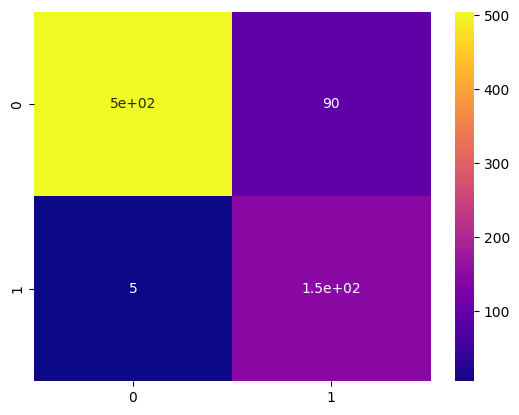

In [31]:
sns.heatmap(cm,cmap = "plasma" , annot=True)

In [32]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ***Confusion Matrix***

Confusion matrix, without normalization
[[505  90]
 [  5 147]]


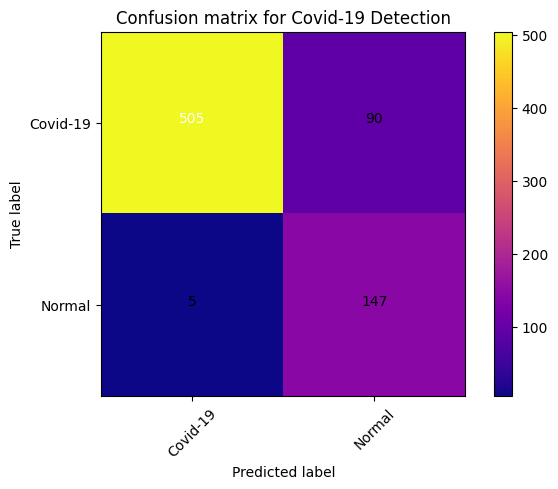

In [33]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


# **List all data in history**

In [ ]:

history = hist
print(history.history.keys())

# **Summarize history for accuracy**

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Summarize history for loss**

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

1/1 [==============================] - 1s 1s/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


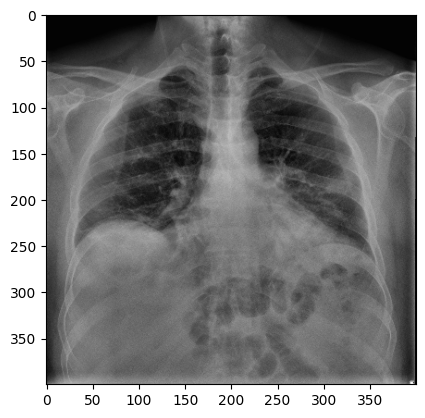

In [39]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = load_img('Dataset/Prediction/0a7faa2a.jpg', target_size = (224, 224))
xtest_image = img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict_classes(xtest_image)
results = predictions = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread('Dataset/Prediction/0a7faa2a.jpg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [1]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = load_img('Dataset/Prediction/NORMAL2-0001.png', target_size = (224, 224))
xtest_image = img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict_classes(xtest_image)
results = predictions = (model.predict(xtest_image) > 0.5).astype("int32")

# training_set.class_indices

imggg = cv2.imread('Dataset/Prediction/NORMAL2-0001.png')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)